# 6.3 Geographic Visualization 

## This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Export Data

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [142]:
# Import ".json" file for the counties of NY state 

NY_geo = r'/Users/maitran/Documents/Grad Rate NY 2022/02 Data/Original Data/cugir-007865-geojson.json'

In [145]:
# We can look at the JSON file contents here too:

f = open(r'/Users/maitran/Documents/Grad Rate NY 2022/02 Data/Original Data/cugir-007865-geojson.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'cugir007865.1', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.712396, 44.953008], [-74.711132, 44.953008], [-74.691251, 44.953], [-74.690671, 44.952909], [-74.689482, 44.9529], [-74.668382, 44.952777], [-74.667773, 44.95277], [-74.641872, 44.952621], [-74.636018, 44.910792], [-74.635172, 44.904471], [-74.63121, 44.875391], [-74.63048, 44.869393], [-74.629994, 44.865378], [-74.629519, 44.861096], [-74.629231, 44.859404], [-74.628731, 44.857004], [-74.628559, 44.856249], [-74.626236, 44.838506], [-74.625049, 44.830346], [-74.62294, 44.815154], [-74.622615, 44.812766], [-74.622537, 44.812195], [-74.621928, 44.807683], [-74.619921, 44.792855], [-74.617402, 44.774552], [-74.614223, 44.752374], [-74.613318, 44.74575], [-74.610841, 44.72708], [-74.607362, 44.703708], [-74.604547, 44.686315], [-74.602938, 44.67662], [-74.589474, 44.598732], [-74.571215, 44.470241], [-74.570132, 44.463396], [-74.55863, 44.385142], [-74.557046, 44.372935], [-74.5535, 44.3

In [20]:
# Define path

path = r'/Users/maitran/Documents/Grad Rate NY 2022'

In [21]:
# Import clean data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'grad_rate_22_wrangled.csv'), index_col = 0)

In [22]:
# Check the import

df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,needs_to_resource_capacity_description,county_code,county_name,boces_name,membership_code,...,regents_advanced_count,regents_advanced_percentage,non_diploma_credential_count,non_diploma_credential_percentage,still_enroll_count,still_enroll_percentage,ged_count,ged_percentage,dropout_count,dropout_percentage
0,2021-22,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,6,...,80908,39%,2058,1%,4664,2%,1746,1%,15088,7%
1,2021-22,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,6,...,36656,34%,1370,1%,3081,3%,1046,1%,9642,9%
2,2021-22,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,6,...,44252,44%,688,1%,1583,2%,700,1%,5446,5%
3,2021-22,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,6,...,78902,46%,38,0%,1848,1%,1250,1%,10737,6%
4,2021-22,0,Statewide,0.0,All Districts and Charters,NaN,NaN,NaN,NaN,6,...,2006,6%,2020,6%,2816,8%,496,1%,4351,13%


In [23]:
df.shape

(221866, 31)

## 2. Data wrangling

In [24]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_code', 'aggregation_name',
       'needs_to_resource_capacity_description', 'county_code', 'county_name',
       'boces_name', 'membership_code', 'membership_key', 'membership_desc',
       'subgroup_code', 'subgroup_name', 'enroll_count', 'grad_count',
       'grad_percentage', 'local_count', 'local_percentage',
       'regents_diploma_count', 'regents_diploma_percentage',
       'regents_advanced_count', 'regents_advanced_percentage',
       'non_diploma_credential_count', 'non_diploma_credential_percentage',
       'still_enroll_count', 'still_enroll_percentage', 'ged_count',
       'ged_percentage', 'dropout_count', 'dropout_percentage'],
      dtype='object')

In [25]:
# Select only the necessary columns and put them in a list called columns
columns = ['county_name', 'membership_desc', 'subgroup_name', 'enroll_count', 'grad_count','local_count', 'regents_diploma_count','regents_advanced_count', 'non_diploma_credential_count', 'still_enroll_count', 'ged_count', 'dropout_count']

In [31]:
county_rec=df[columns]

In [37]:
county_rec.head()

,county_name,membership_desc,subgroup_name,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count
0,NaN,2016 Total Cohort - 6 Year Outcome,All Students,207157,183454,6212,96334,80908,2058,4664,1746,15088
1,NaN,2016 Total Cohort - 6 Year Outcome,Male,106269,91038,3596,50786,36656,1370,3081,1046,9642
2,NaN,2016 Total Cohort - 6 Year Outcome,Female,100888,92416,2616,45548,44252,688,1583,700,5446
3,NaN,2016 Total Cohort - 6 Year Outcome,General Education Students,173366,159392,1287,79203,78902,38,1848,1250,10737
4,NaN,2016 Total Cohort - 6 Year Outcome,Students with Disabilities,33791,24062,4925,17131,2006,2020,2816,496,4351
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,2017 Total Cohort - 5 Year Outcome,American Indian or Alaska Native,67,51,2,41,8,0,10,1,5
996,NaN,2017 Total Cohort - 5 Year Outcome,Asian or Native Hawaiian/Other Pacific Islander,170,138,6,71,61,0,27,2,3
997,NaN,2017 Total Cohort - 5 Year Outcome,Black or African American,3354,2879,123,2032,724,3,283,33,151
998,NaN,2017 Total Cohort - 5 Year Outcome,Hispanic or Latino,2805,2399,109,1477,813,2,264,20,118


In [42]:
# Change the way the counties name displayed to make them be consistent in both df and jason file
county_rec['county_name'] = county_rec['county_name'].str.title() 

/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_42589/3504780348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_rec['county_name'] = county_rec['county_name'].str.title()


## 3. Conduct consistency checks

### Missing Values

In [33]:
# Check for missing values

county_rec.isnull().sum()

county_name                     1098
membership_desc                    0
subgroup_name                      0
enroll_count                       0
grad_count                         0
local_count                        0
regents_diploma_count              0
regents_advanced_count             0
non_diploma_credential_count       0
still_enroll_count                 0
ged_count                          0
dropout_count                      0
dtype: int64

In [45]:
# Remove missing values as they are values for Statewide not county, so remove them won't affect the data
county_rec_cleaned = county_rec.dropna(subset=['county_name'])

In [46]:
# Check for missing values again

county_rec_cleaned.isnull().sum()

county_name                     0
membership_desc                 0
subgroup_name                   0
enroll_count                    0
grad_count                      0
local_count                     0
regents_diploma_count           0
regents_advanced_count          0
non_diploma_credential_count    0
still_enroll_count              0
ged_count                       0
dropout_count                   0
dtype: int64

### Duplicates

In [47]:
# Check for duplicates
dups = county_rec_cleaned.duplicated()

In [48]:
dups.shape # no dups

(220768,)

In [73]:
# Export the cleaned df
county_rec_cleaned.to_csv(os.path.join(path, '02 Data','Prepared Data', 'county_rec_cleaned.csv'))

### Extreme values checks

Note: Some columns are not numeric but string instead. I convert them back to numeric so i can check the extreme values

In [100]:
# List of columns to convert to numeric
columns_to_convert = ['enroll_count', 'grad_count', 'local_count',
                      'regents_diploma_count', 'regents_advanced_count',
                      'non_diploma_credential_count', 'still_enroll_count',
                      'ged_count', 'dropout_count']

# Convert columns to numeric
for column in columns_to_convert:
    county_rec_cleaned[column] = pd.to_numeric(county_rec_cleaned[column], errors='coerce')


#### Check extreme value for enroll_count

<AxesSubplot:xlabel='grad_count', ylabel='Count'>

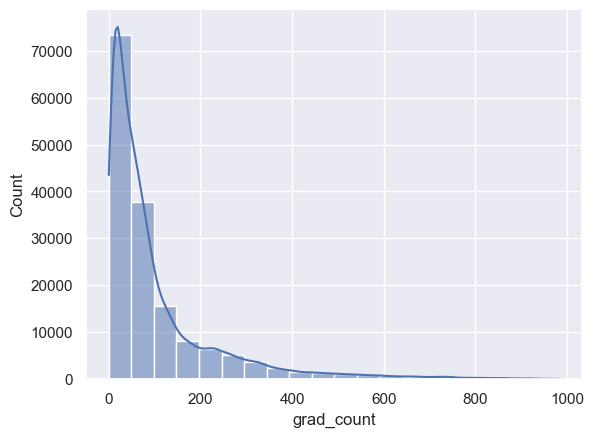

In [134]:
# Check extreme value 
sns.histplot(county_rec_cleaned['grad_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for enroll_count

<AxesSubplot:xlabel='enroll_count', ylabel='Count'>

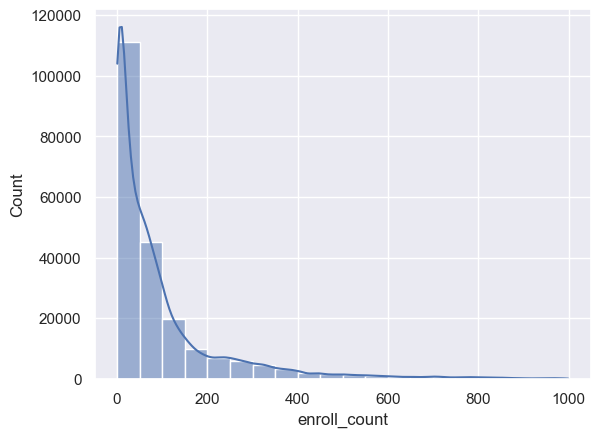

In [101]:
# Check extreme value 
sns.histplot(county_rec_cleaned['enroll_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for local_count

<AxesSubplot:xlabel='local_count', ylabel='Count'>

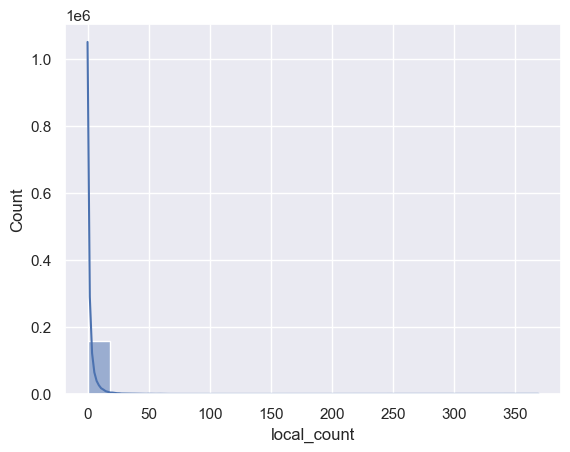

In [102]:
# Check extreme value 
sns.histplot(county_rec_cleaned['local_count'], bins = 20, kde = True)

In [119]:
# Check how many extreme values

county_rec_cleaned[county_rec_cleaned['local_count'] >50]  # No extreme value

,county_name,membership_desc,subgroup_name,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count


#### Check extreme value for regents_diploma_count

<AxesSubplot:xlabel='regents_diploma_count', ylabel='Count'>

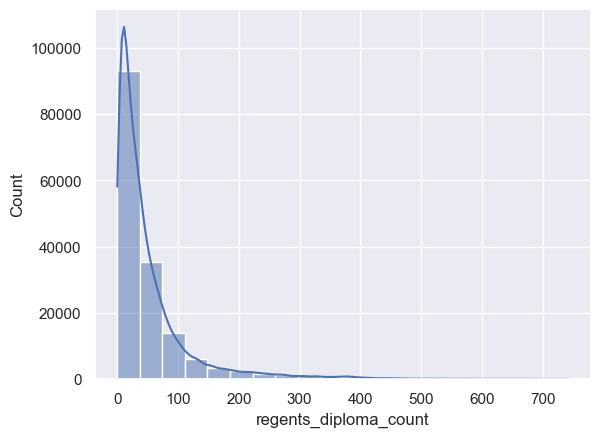

In [125]:
# Check extreme value 
sns.histplot(county_rec_cleaned['regents_diploma_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for regents_advanced_count

<AxesSubplot:xlabel='regents_advanced_count', ylabel='Count'>

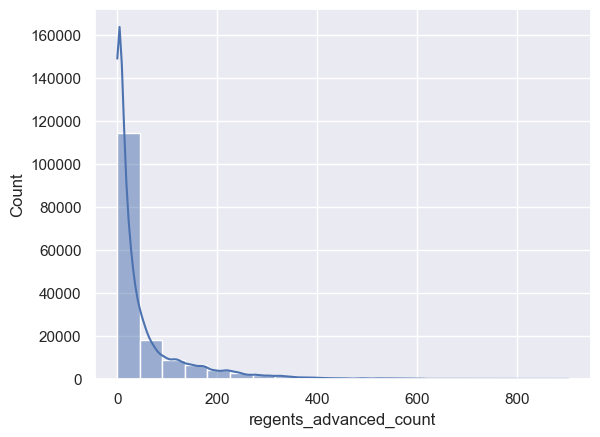

In [126]:
# Check extreme value 
sns.histplot(county_rec_cleaned['regents_advanced_count'], bins = 20, kde = True) # No extreme value

#### Check extremevalue for non_diploma_credential_count

<AxesSubplot:xlabel='non_diploma_credential_count', ylabel='Count'>

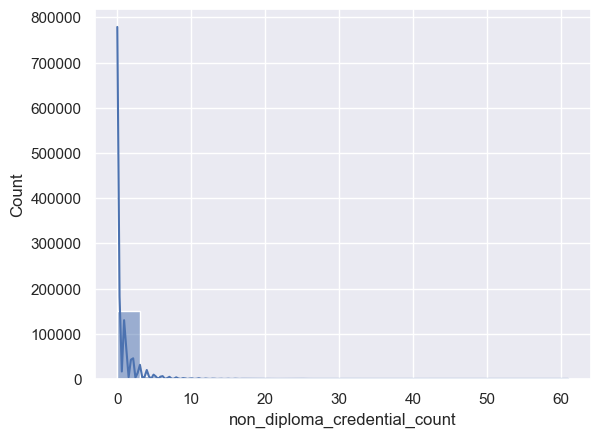

In [127]:
# Check extreme value 
sns.histplot(county_rec_cleaned['non_diploma_credential_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for still_enroll_count

<AxesSubplot:xlabel='still_enroll_count', ylabel='Count'>

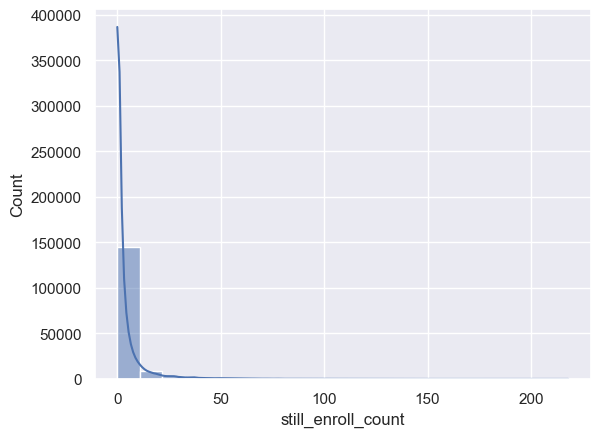

In [129]:
# Check extreme value 
sns.histplot(county_rec_cleaned['still_enroll_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for ged_count

<AxesSubplot:xlabel='ged_count', ylabel='Count'>

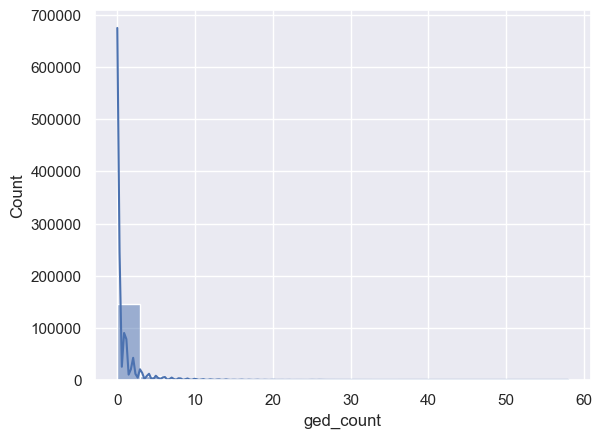

In [132]:
# Check extreme value 
sns.histplot(county_rec_cleaned['ged_count'], bins = 20, kde = True) # No extreme value

#### Check extreme value for dropout_count

<AxesSubplot:xlabel='dropout_count', ylabel='Count'>

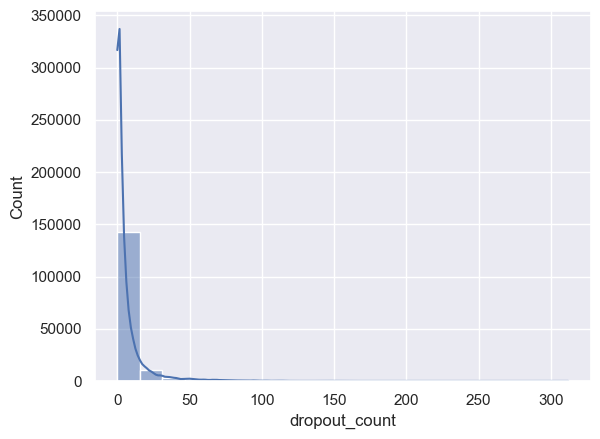

In [133]:
# Check extreme value 
sns.histplot(county_rec_cleaned['dropout_count'], bins = 20, kde = True) # No extreme value

## 4. Create a choropleth map 


In [135]:
county_rec_cleaned.head()

,county_name,membership_desc,subgroup_name,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count
1103,Albany,2016 Total Cohort - 6 Year Outcome,American Indian or Alaska Native,8,6.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0
1104,Albany,2016 Total Cohort - 6 Year Outcome,Asian or Native Hawaiian/Other Pacific Islander,284,272.0,1.0,62.0,209.0,2.0,2.0,0.0,8.0
1105,Albany,2016 Total Cohort - 6 Year Outcome,Black or African American,651,537.0,26.0,378.0,133.0,12.0,27.0,6.0,69.0
1106,Albany,2016 Total Cohort - 6 Year Outcome,Hispanic or Latino,247,200.0,12.0,117.0,71.0,5.0,5.0,2.0,35.0
1108,Albany,2016 Total Cohort - 6 Year Outcome,Multiracial,102,88.0,1.0,46.0,41.0,0.0,2.0,0.0,12.0


In [136]:
# Create a data frame with just the counties and the values for grad_count we want plotted

data_to_plot = county_rec_cleaned[['county_name','grad_count']]
data_to_plot.head()

,county_name,grad_count
1103,Albany,6.0
1104,Albany,272.0
1105,Albany,537.0
1106,Albany,200.0
1108,Albany,88.0


In [144]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = NY_geo, 
    data = data_to_plot,
    columns = ['county_name','grad_count'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "county_name").add_to(map)
folium.LayerControl().add_to(map)

map

Observation: The map helps me answer this question "How does the graduation rate vary across different counties?" We can see that the graduation rate indeed varies across all counties. Hempstead, Canandaigue, Schenectady have highest rate of grad count. 

It leads me to the new question of what factors help these counties have the highest grad rate.

## Export Data

In [146]:
map.save('plot_data.html')

In [147]:
county_rec_cleaned.to_csv(os.path.join(path, '02 Data','Prepared Data', 'county_rec_cleaned.csv'))